Condition for Linear Regression Analysis: The assumption is nature of dependent and independent variable has to be continuous variable. Sometimes we have to add categorical variable to independent variable category. For this we have to use this.

In [1]:
import pandas as pd
import matplotlib as mpl
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as s

In [2]:
# ScreenShot 1424
tbl = pd.read_excel('dummy.xlsx')
tbl

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


Text(0.5, 1.0, 'Simple Linear Regression')

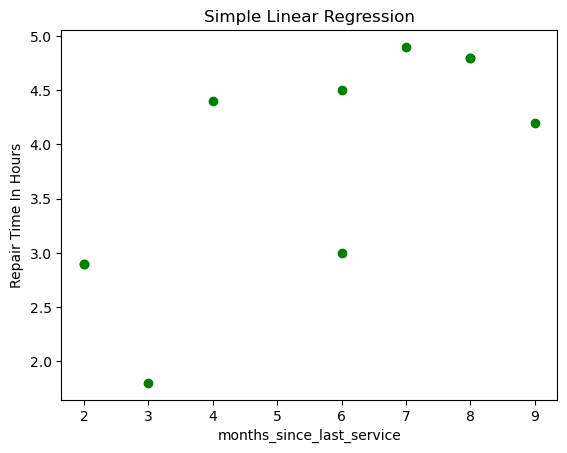

In [3]:
plt.scatter(tbl['months_since_last_service'], tbl['repair_time_in_hours'], color="green")
plt.ylabel('Repair Time In Hours')
plt.xlabel('months_since_last_service')
plt.title('Simple Linear Regression')

# months since last services more the repair time in hours also getting more
# Simple linear regression with 1 independent variable which is continuous

In [4]:
from statsmodels.formula.api import ols
Reg = ols(formula ="repair_time_in_hours ~ months_since_last_service", data=tbl)
Fit1 = Reg.fit()
print(Fit1.summary())

# dependent_variable ~ independet_variable
# R-squared = 53.4% 
# p-value = 0.016 < 0.05 hence it is significant value


                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Wed, 23 Aug 2023   Prob (F-statistic):             0.0163
Time:                          14:23:39   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


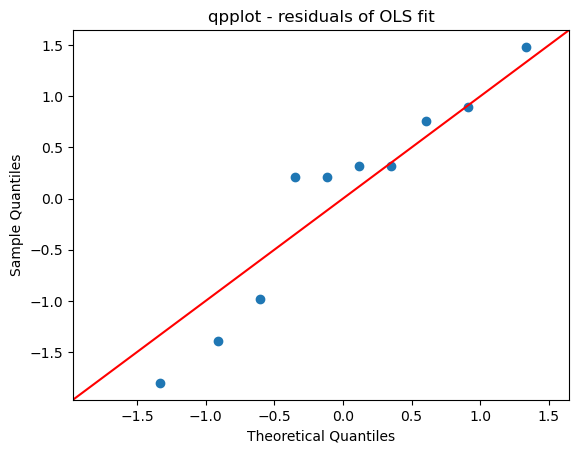

In [5]:
res = Fit1.resid # residual
probplot = s.ProbPlot(res,stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qpplot - residuals of OLS fit')
plt.show()

# even if the residual plot is not appropriate so the error is not following 
# normal distribution 

In [6]:
# create dummy variable for a categorical data
# it check whether the problem is related to electrical or mechanical 
just_dummies = pd.get_dummies(tbl['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [7]:
just_dummies = pd.get_dummies(tbl['type_of_repair'])
step_1 = pd.concat([tbl, just_dummies],axis=1)

step_1.drop(['type_of_repair','mechanical'], inplace=True, axis=1)
step_1

# to run the regression we want to get rid of the strings 'mechanical' and 'electrical'
# and we want to get rid of dummy variable to avoid the dummy variable trap
# arbitrarily chose 'mechanical', coeff on 'electrical' would show effect of 'electrical'
# relative to 'mechanical'

# Here we have dropped the column that is type_of_repair then added only dummy
# variable wrt electrical repair
# electrical column is now an independent variable 

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [8]:
result = sm.OLS(step_1['repair_time_in_hours'], s.add_constant(step_1[['months_since_last_service','electrical']])).fit()
print(result.summary())
# r-squared increased to 0.859 bcoz of increase of variable Prob(F-Statistic)
# value is very low so regression as a whole is significant
# 

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Wed, 23 Aug 2023   Prob (F-statistic):            0.00105
Time:                          14:23:41   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
# ScreenShot 1449
tbl2 = pd.read_excel('dummy2.xlsx')
tbl2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


Text(0.5, 1.0, 'Simple Linear Regression')

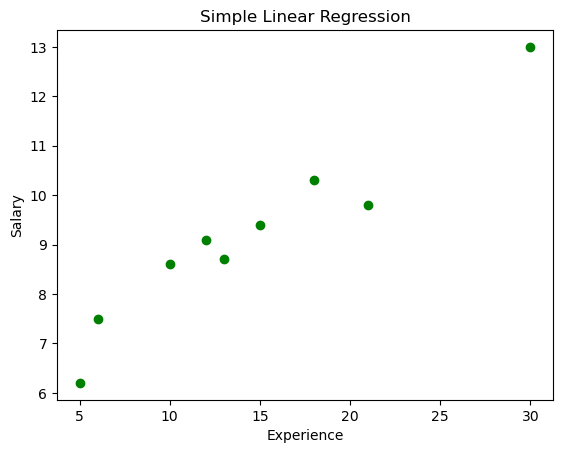

In [10]:
plt.scatter(tbl2['Experience'], tbl2['Salary'], color="green")
plt.ylabel('Salary')
plt.xlabel('Experience')
plt.title('Simple Linear Regression')

In [11]:
Reg2 = ols(formula="Salary ~ Experience", data=tbl2)
Fit2 = Reg2.fit()
print(Fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           3.30e-05
Time:                        14:23:45   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.0

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
# residual plot error analysis
influence = Fit2.get_influence()
resid_student = influence.resid_studentized_external

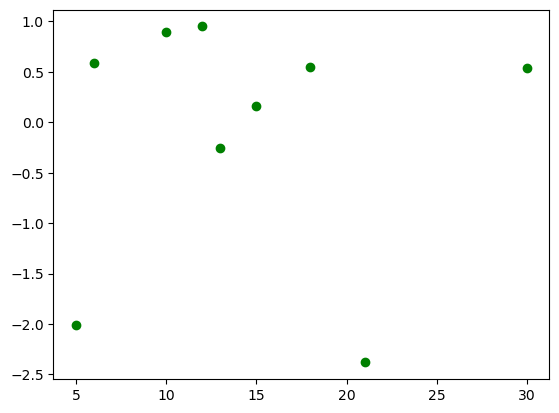

In [13]:
plt.figure()
plt.scatter(tbl2['Experience'], resid_student, color="green")

In [14]:
# making of dummy variable
just_dummies2 = pd.get_dummies(tbl2['Gender'])
just_dummies2
# male is taken as 1 and female is taken as 0
# female will be taken in account where 0 as male and 1 as female

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [15]:
step_1 = pd.concat([tbl2, just_dummies2], axis = 1)
#for 1st 2 results
#step_1.drop(['Gender','Male'], inplace=True, axis=1)

# to run the regression we want to get rid of the strings 'male' and 'female'
# and we want to get rid of dummy variable to avoid the dummy variable trap
# arbitrarily chose 'male', coeff on 'female' would show effect of 'female'
# relative to 'male'

#result = sm.OLS(step_1['Salary'], s.add_constant(step_1[['Female']])).fit()
#result = sm.OLS(step_1['Salary'], s.add_constant(step_1[['Experience','Female']])).fit()

step_1.drop(['Gender','Female'], inplace=True, axis=1)
result = sm.OLS(step_1['Salary'], s.add_constant(step_1[['Male']])).fit() # 0 for females and 1 for males

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Wed, 23 Aug 2023   Prob (F-statistic):              0.389
Time:                        14:23:48   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5250      0.954      8.935      0.0

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
